<a href="https://colab.research.google.com/github/PalakAggarwal13/ML_Projects/blob/main/Project_7_Car_Predictions/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso , Ridge
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3).zip


In [3]:
import zipfile

with zipfile.ZipFile('archive (3).zip','r') as zip_ref:
  zip_ref.extractall('CarPricePrediction_dataset')

import os
print(os.listdir('CarPricePrediction_dataset'))

['CAR DETAILS FROM CAR DEKHO.csv', 'Car details v3.csv', 'car data.csv', 'car details v4.csv']


In [4]:
car_data = pd.read_csv('CarPricePrediction_dataset/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
car_data.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3},
                  'Seller_Type':{'Dealer':1,'Individual':2} ,
                  'Transmission':{'Manual':1,'Automatic':2}}, inplace = True)

/tmp/ipython-input-8-1629465889.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3},


In [9]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [12]:
model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [14]:
preds = model.predict(X_train)

In [21]:
error_score = metrics.r2_score(preds,Y_train)
print(error_score)

0.8701194968860396


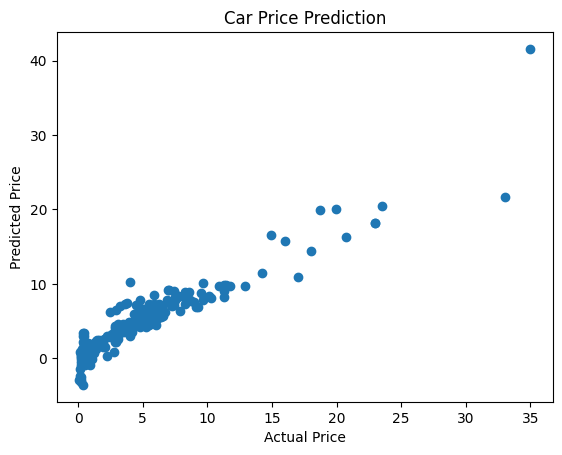

In [23]:
plt.scatter(Y_train,preds)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Price Prediction')
plt.show()

In [24]:
test_preds = model.predict(X_test)

In [25]:
test_error_score = metrics.r2_score(test_preds,Y_test)
print(test_error_score)

0.783883683290713


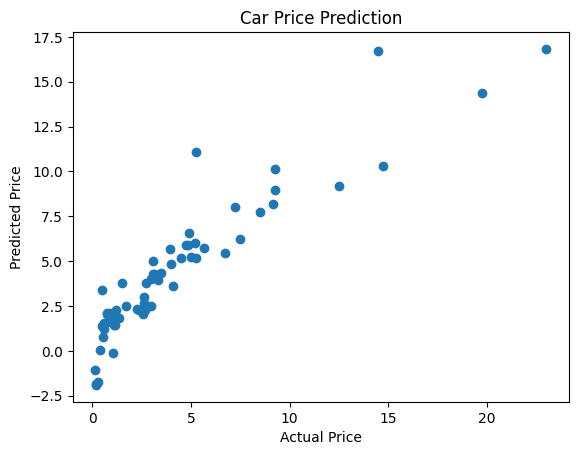

In [26]:
plt.scatter(Y_test,test_preds)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Price Prediction')
plt.show()

In [27]:
lasso_reg = Lasso()

lasso_reg = lasso_reg.fit(X_train,Y_train)

In [34]:
lasso_preds = lasso_reg.predict(X_train)

In [35]:
lasso_error = metrics.r2_score(lasso_preds,Y_train)
print(lasso_error)

0.8078478746405298


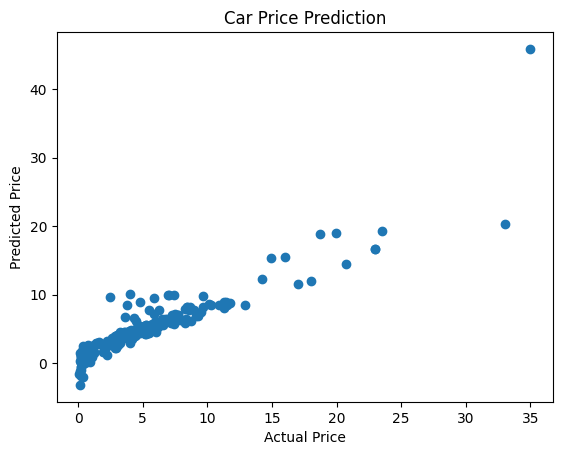

In [38]:
plt.scatter(Y_train,lasso_preds)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Price Prediction')
plt.show()

In [30]:
lasso_test_preds = lasso_reg.predict(X_test)

In [31]:
lasso_test_error = metrics.r2_score(lasso_test_preds,Y_test)
print(lasso_test_error)

0.6546066257804593


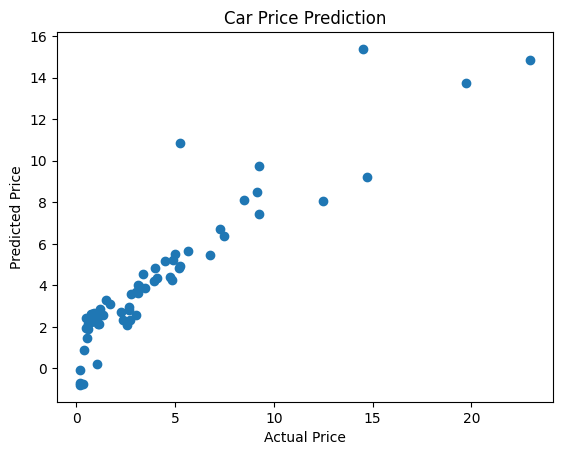

In [37]:
plt.scatter(Y_test,lasso_test_preds)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Price Prediction')
plt.show()

In [40]:
ridge_reg = Ridge()

ridge_reg = ridge_reg.fit(X_train,Y_train)

In [41]:
ridge_preds = ridge_reg.predict(X_train)

In [42]:
ridge_error = metrics.r2_score(ridge_preds,Y_train)
print(ridge_error)

0.8697959271121303


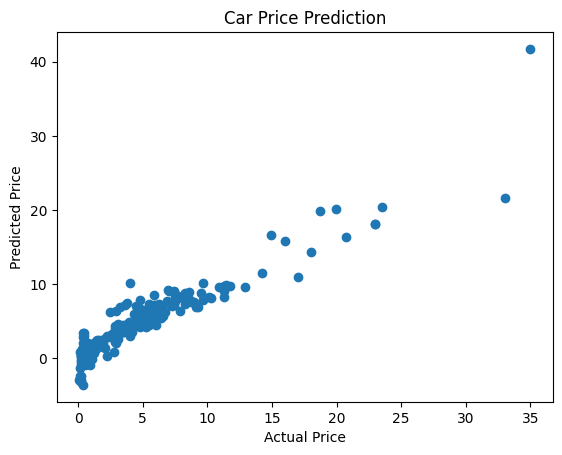

In [43]:
plt.scatter(Y_train,ridge_preds)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Price Prediction')
plt.show()

In [44]:
ridge_test_preds = ridge_reg.predict(X_test)

In [45]:
ridge_test_error = metrics.r2_score(ridge_test_preds,Y_test)
print(ridge_test_error)

0.7827433820259597


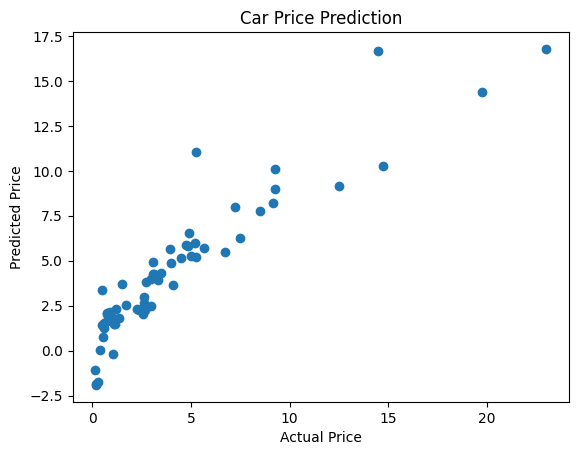

In [46]:
plt.scatter(Y_test,ridge_test_preds)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Price Prediction')
plt.show()